# Climate change in the World

## This study will analyse temperature measurements from around the globe and take conclusions about the data analysed


In [314]:
# To start off, data from the measurements must be imported to the file

# initialize variables that will be used to collect data from file
dates = []
average_temp = []
average_temp_unc = []
# is not empty to avoid error
cities=[0]
countries = []
latitudes=[]
longitudes = []
# is not empty to avoid error
years=[0]
temperature_sum=0
uncertainty_sum = 0
i=0
# import csv module and datetime module
import csv
from datetime import datetime
# open the file
with open('GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv', newline='') as data_climate:
    # save the data retrieved from the file into "dataset" variable
    dataset = csv.DictReader(data_climate)  
    # iterate through dataset
    for row in dataset:
        # file presents measurements with date YYYY - MM -- DD but we'll want to group the measurements by year
        # get year from measurement
        year = (datetime.strptime(row['dt'],'%Y-%m-%d')).year
        # some measurements are empty - no recorded temperature. These entries must be ignored
        if row['AverageTemperature'] != '':
            # in order to group the measurements by year we must compare every measurement with the previous one, in 
            # order to check if the year and the city are the same, so that we can group them
            if years[-1] == year and cities[-1] == row['City']:
                # if the year/city are the same from the precious entry a mean will be calculated for each year
                # instead of saving the temperature, the program will save every measurement into a variable and
                # then divide the sum by the number of entries in order to obtain the mean (i will represent number of entries)
                temperature_sum = temperature_sum + float(row['AverageTemperature'])
                uncertainty_sum = uncertainty_sum + float(row['AverageTemperatureUncertainty'])
                i += 1
            else:
                # if the entry is not for the same city/year the code will save the means into the lists
                if temperature_sum !=0 and uncertainty_sum != 0:
                    average_temp.append(temperature_sum/i)
                    average_temp_unc.append(uncertainty_sum/i)
                    
                # re-initialize mean variables so that for every year we get the right means (also the (i) number of entries)
                temperature_sum = 0
                uncertainty_sum = 0
                i = 0
                # store data into variables
                years.append(year)
                cities.append(row['City'])
                countries.append(row['Country'])
                latitudes.append(row['Latitude'])
                longitudes.append(row['Longitude'])
    # delete the first entries from these lists
    # these entries were put to avoid an error for the first time the code runs. If years is empty the first time it runs
    # then years[-1] will be an error
    del years[0]
    del cities[0]

In [315]:
class Climate:
    # -------------------------------------------------------------------------------------------------------------- #
    # INITIALIZATION FUNCTION
    # associates the data collected from the "GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv" file
    def __init__(self,year,average_temp, average_unc, city, country,latitude,longitude):
        self.measure_year = year
        self.avg_temp = average_temp
        self.avg_unc = average_unc
        self.city = city
        self.country = country
        self.latitude = latitude
        self.longitude = longitude 
        
    # -------------------------------------------------------------------------------------------------------------- #
    # FIND HOW MANY COUNTRIES ARE STUDIED IN "GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv"
    # the file has measurements per month for an interval of years, which means that the same country appears
    # several times. Therefore we have to eliminate duplicates to find how many countries are studied
    def analyse_countries(self, countries):
        # eliminate duplicate entries from "countries" and store them into "countries_transformed"
        countries_transformed = list(dict.fromkeys(countries))
        # print message with how many countries are studied
        print('There are {} countries in the data base'.format(len(countries_transformed)))
        # return the list with each country in the study (without duplicates)
        return countries_transformed
    
    # -------------------------------------------------------------------------------------------------------------- #
    # GROUP COUNTRIES PRESENT IN "GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv" BY CONTINENT
    # it will be important to know which continent every country belongs to
    def locate_countries(self, cities):
        # initialize variables - one list per continent
        asia = []
        africa = []
        oceania = []
        north_america = []
        south_america = []
        europe = []
        population = []
        gdp=[]
        # import a file that has information abaout every city. The file has COUNTRY, CONTINENT, POPULATION and GDP PER CAPITA
        # this will tell to which continent every country belongs to
        import csv
        # the file is called "worldcities.csv" and the enconding is a PRE-DEFININITION (DO NOT CHANGE IT)
        with open('worldcities.csv',  encoding='utf-8') as data_countries:
            # read the data of the file into the "dataset_countries" variable
            dataset_countries = csv.DictReader(data_countries)
            # eliminate duplicate cities - as the data is per year, the same country will appear several times
            cities_transformed = list(dict.fromkeys(cities))
            # iterate through every contry in the imported file
            for row in dataset_countries:
                # iterate through every city that we have measurements for
                for city in cities_transformed:
                    # if the city that we have measurements to appears in the "worldcities.csv" file
                    if city == row['city']:
                        # if the country is associated with Africa in "worldcities.csv"
                        if row['continent'] == 'Africa' and (row['country'] in africa) == False:
                            # add that country to the list "africa"
                            africa.append(row['country'])
                        #process repeats for every continent
                        elif row['continent'] == 'Europe' and (row['country'] in europe) == False:
                            europe.append(row['country'])
                        elif row['continent'] == 'Asia' and (row['country'] in asia) == False:
                            asia.append(row['country']) 
                        elif row['continent'] == 'Oceania' and (row['country'] in oceania) == False:
                            oceania.append(row['country'])
                        elif row['continent'] == 'South America' and (row['country'] in south_america) == False:
                            south_america.append(row['country'])
                        elif row['continent'] == 'North America' and (row['country'] in north_america) == False:
                            north_america.append(row['country'])
                gdp.append(row['gdp_per_capita_2020'])
                population.append(row['population'])
            
            # returns the lists that have the countries per continent
            return asia, africa, europe, oceania, north_america, south_america, gdp, population
    
    # -------------------------------------------------------------------------------------------------------------- #
    # PLOT THE DISTRIBUTION OF COUNTRIES PER CONTINENT IN THIS STUDY
    # find which of the continents is best represented must be taken into account in the final analysis
    def plot_countries(self, europe, asia, africa, oceania, north_america, south_america, countries_transformed):
        #import matlib module to create plot
        import matplotlib.pyplot as plt
        #get the number of countries per continent
        num_europe = len(europe)
        num_asia = len(asia)
        num_africa = len(africa)
        num_oceania = len(oceania)
        num_north_america = len(north_america)
        num_south_america = len(south_america)
        # create a list that has how many countries there are per continent, for every continent
        continents_array = [num_europe, num_asia, num_africa, num_oceania, num_north_america, num_south_america]
        # start the plot
        fig = plt.figure()
            # create axis
        ax = fig.add_axes([0,0,1,1])
            # create the legend for the x axis
        continents = ['Europe', 'Asia', 'Africa', 'Oceania', 'North Am.', 'South Am.']
            # 'continents' will go to the x axis and 'continents_array' to the y axis
        graph = ax.bar(continents,continents_array)
        ax.set_ylim([0, 20])
        plt.title("Representation of continents in study")  
            # giving X and Y labels
        plt.xlabel("Continents")
        plt.ylabel("Number of Countries represented")
        # create labels for the bars ( -0.1 and 0.5 are obtained by experimenting several values)
        for i in range(len(continents)):
            plt.annotate(continents_array[i], (-0.1 + i, continents_array[i] + 0.5))
        # show the plot
        plt.show()
        
        # print the how many % each continent is represented in the study
        # len(num_europe) represents how many european contries we have and len(countries_transformed) represents how many countries
        # we have in the study
        print ('Europe represents ' + str(int(num_europe/len(countries_transformed)*100)) + '% of the countries studied')
        print ('Asia represents ' + str(int(num_asia/len(countries_transformed)*100)) + '% of the countries studied')
        print ('Africa represents ' + str(int(num_africa/len(countries_transformed)*100)) + '% of the countries studied')
        print ('Oceania represents ' + str(int(num_oceania/len(countries_transformed)*100)) + '% of the countries studied')
        print ('North America represents ' + str(int(num_north_america/len(countries_transformed)*100)) + '% of the countries studied')
        print ('South America represents ' + str(int(num_south_america/len(countries_transformed)*100)) + '% of the countries studied')
        
       # -------------------------------------------------------------------------------------------------------------- #
    def organize_dict_data(self,year,average_temp, average_unc, city, countries_list ,latitude,longitude, population, gdp):
        # initialize variables - one list per continent
        individual_data ={}
        
        j=0
        for i in range(len(city)):
                if city[i] != city[i+1] or i == 0:
                    individual_data['city'] = city[i]
                    individual_data['country'] = countries_list[j]
                    individual_data['gdp'] = gdp[j]
                    individual_data['population'] = population[j]
                    individual_data['longitude'] = longitude[i]
                    individual_data['latitude'] = latitude[i]
                    
                    

In [316]:
# Instantize class
climate_data_rec = Climate(years, average_temp, average_temp_unc, cities, countries, latitudes, longitudes)

In [317]:
# get how many contries we have per continent and save the result into lists with the continents' names
asia, africa, europe, oceania, north_america, south_america, gdp, population = climate_data_rec.locate_countries(cities)

In [318]:
# get how many countries we have in this study and save the list of countries into "countries_list"
countries_list = climate_data_rec.analyse_countries(countries)

There are 49 countries in the data base


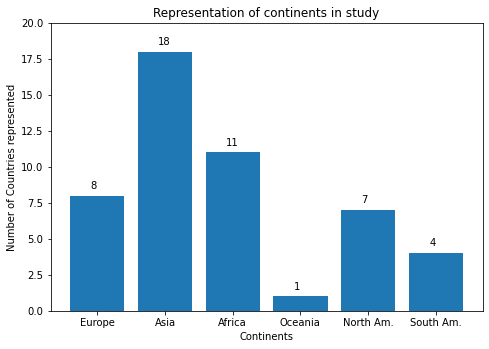

Europe represents 16% of the countries studied
Asia represents 36% of the countries studied
Africa represents 22% of the countries studied
Oceania represents 2% of the countries studied
North America represents 14% of the countries studied
South America represents 8% of the countries studied


In [319]:
# plot the distribuition of countries per continent
climate_data_rec.plot_countries(europe, asia, africa, oceania, north_america, south_america, countries_list)